<a href="https://colab.research.google.com/github/priyanka12177/data_projects-ADVDS/blob/Project5/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Read  file from github into a dataframe
# recognize letters using voting and ensemble classifiers 
df = pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/letters.csv')


In [ ]:
# head function is used to get the first 5 rows which displays the columns and data
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


In [ ]:
# info function is used to get the data type information for each column in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  class   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df.shape

(20000, 17)

In [ ]:
# checking the class column distribution
df['class'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: class, dtype: int64

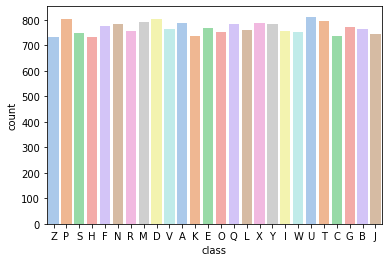

In [ ]:
#  label frequencies 
# Plotting the frequencies using seaborn package to see how the class is distributed
import seaborn as sns
sns.countplot(x = 'class', palette = 'pastel', data=df)



In [ ]:
# Encoding the class column to covert to numerical
# importing the ordinalencoder function from sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# Apply OrdinalEncoder
df[["class"]] = enc.fit_transform(df[["class"]])

In [ ]:
# checking missing values for all the columns in the dataframe
df.isnull().sum().sort_values( ascending=False)

# As there are no missing values no need to perform imputation

x-box    0
xybar    0
yegvx    0
y-ege    0
xegvy    0
x-ege    0
xy2br    0
x2ybr    0
y2bar    0
y-box    0
x2bar    0
y-bar    0
x-bar    0
onpix    0
high     0
width    0
class    0
dtype: int64

In [ ]:
# Assigning input variables to X by excluding target column
X = df.drop('class', axis=1)

# Assigning target variables to Y
Y = df['class']

In [ ]:

# Dataset is split into training by 80% and testing  with 20% 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Examine the train and test dataset sizes
X_train.shape, X_test.shape

((16000, 16), (4000, 16))

In [ ]:
# SGD classifier
# Parallelize the job over 5 workers
#importing SGDClassifier function

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, penalty = 'l1',
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

#fit model
sgd_classifier.fit(X_train,Y_train)

SGDClassifier(n_jobs=5, penalty='l1', random_state=42)

In [ ]:
# RandomForestClassifier classification model
#import RandomForestClassifier function
# Parallelize the job over 5 workers
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=1000,
                                       n_jobs=5,
                                       max_features=3)

#fit model
rf_classifier.fit(X_train,Y_train)



RandomForestClassifier(max_features=3, n_estimators=1000, n_jobs=5)

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt_classifier = DecisionTreeClassifier()

#fit model
dt_classifier.fit(X_train,Y_train)



DecisionTreeClassifier()

In [ ]:
# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# create extratree cassifier object
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
# fitting model

#fit model
et_classifier.fit(X_train,Y_train)



ExtraTreesClassifier(random_state=0)

In [ ]:
# import svm model
from sklearn import svm

#Create a svm Classifier
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

#fit model
svm_classifier.fit(X_train,Y_train)


SVC(kernel='linear')

In [ ]:
# import cross_val_score,KFold from model_selection

from sklearn.model_selection import cross_val_score, KFold

# cross_validate_model function
def cross_validate_model (classifier_model, X, y):
                kfold = KFold(n_splits=3, shuffle=True, random_state=10)

               # perform model cross validation on the shuffled folds
                results = cross_val_score(classifier_model, X, y, cv=kfold)

              # return the mean score for all folds
                return results.mean()

In [ ]:
# Applying cross_validate_model on svm_classifier
sv = cross_validate_model(svm_classifier,X,Y)
sv

0.8503998367438363

In [ ]:
# Applying cross_validate_model on sgd_classifier
sg = cross_validate_model(sgd_classifier,X,Y)
sg

0.5434994151882564

In [ ]:
# Applying cross_validate_model on ExtraTreesClassifier
et = cross_validate_model(et_classifier,X,Y)
et

0.9667500198347417

In [ ]:
# Applying cross_validate_model on DecisionTree_classifier
dt = cross_validate_model(dt_classifier,X,Y)
dt

0.8653999943267164

In [ ]:
# Applying cross_validate_model on RandomForest_classifier
rf = cross_validate_model(rf_classifier,X,Y)
rf

0.96224991480699

In [ ]:
# import VotingClassifier
from sklearn.ensemble import VotingClassifier

#Create a voting Classifier
vot_classifier = VotingClassifier(estimators=[
 ('svm', svm_classifier), ('SGD', sgd_classifier), ('ET', et_classifier),('dt', dt_classifier),('rf', rf_classifier)],voting='hard')



In [ ]:
# Applying cross_validate_model on RandomForest_classifier
vc  = cross_validate_model(vot_classifier,X,Y)
vc

0.9562499972811139

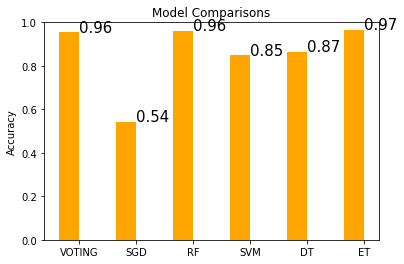

In [ ]:
# plotting the accuracy scores
# creating the labels and trainig score dataframes
labels = ['VOTING','SGD','RF','SVM','DT','ET']
training_scores = [vc,sg,rf,sv,dt, et]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
for index,data in enumerate(training_scores):
    plt.text(x=index , y =data , s=round(data,2) , fontdict=dict(fontsize=15))
plt.title('Model Comparisons')
plt.show()

<BarContainer object of 16 artists>

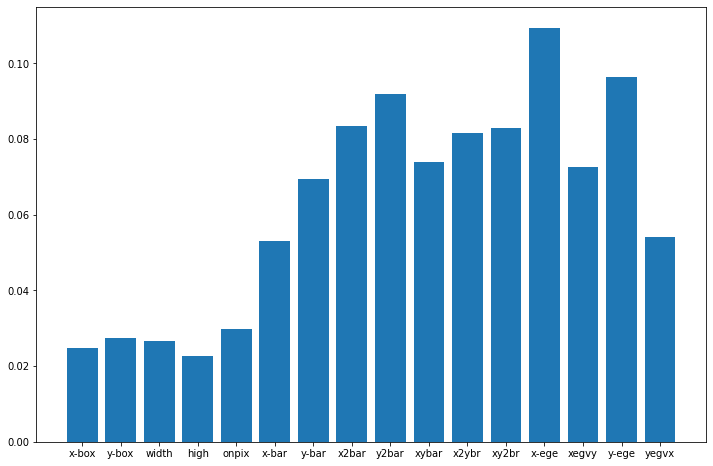

In [ ]:
# Variable importance bar plot of random forest model
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.bar(X_train.columns, rf_classifier.feature_importances_)
#x-ege,y-ege,y2bar are top 3 variables

<BarContainer object of 16 artists>

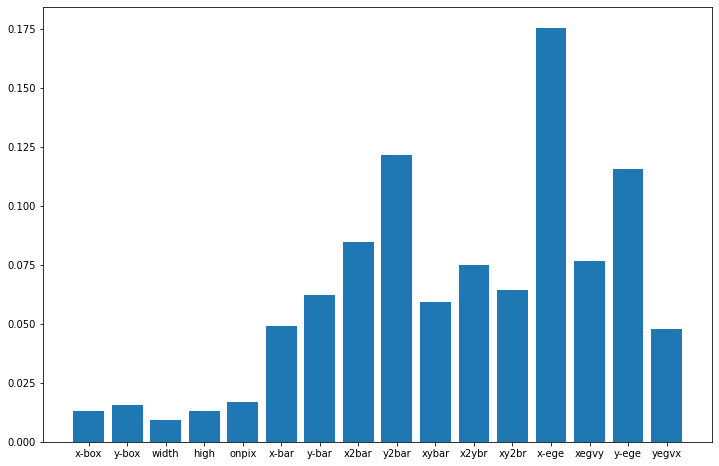

In [ ]:
#bar plot of importance variables in decision tree
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.bar(X_train.columns, dt_classifier.feature_importances_)
#x-ege,y2bar,y-ege are the top3

<BarContainer object of 16 artists>

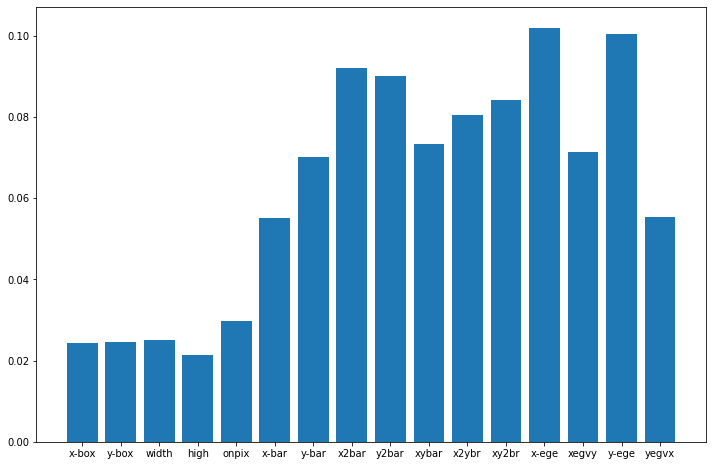

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.bar(X_train.columns, et_classifier.feature_importances_)
#x-ege,y-ege,x2bar are top

In [ ]:
#importing  kmeans function from sklearn
from sklearn.cluster import KMeans
#fitting kmeans clustering
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

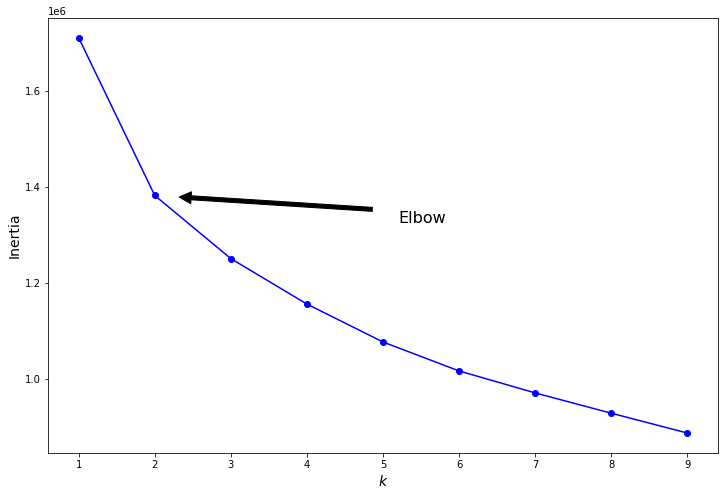

In [ ]:
#Elbow plot for different k values
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()
#K =2  and 3 seen good clusters

In [ ]:
#importing Silhouette score function
from sklearn.metrics import silhouette_score

In [ ]:
#calcualting silhouette scores
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

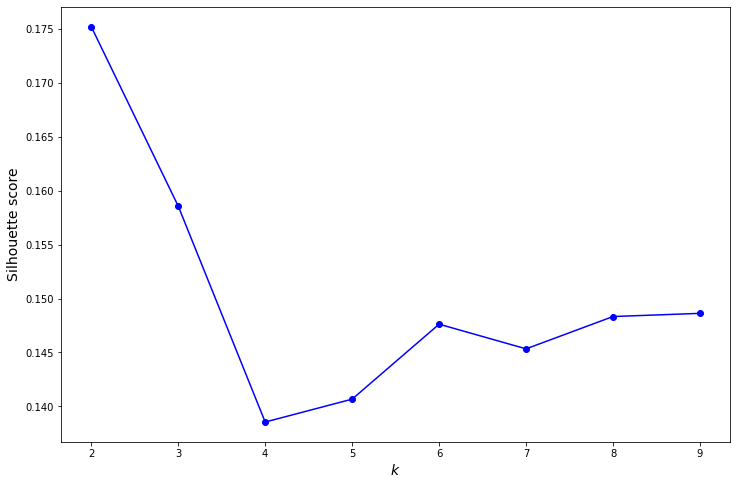

In [ ]:
# plotting the silhouette score
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()
#k=2 has the highest silhouette score

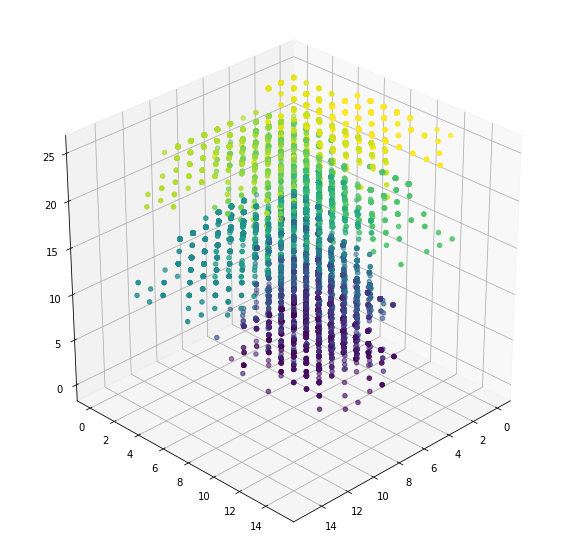

In [ ]:


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(df['x-ege'], df['y-ege'], df['class'],c=df['class'])
 
# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

# **Summary** 

This is dataset of letter prediction based on the input features that include the geometric/statistical features of the letters.THe data set doesn't have any missing values and the target class is well distrubuted.
Extra has the highest accuracy.

**SVM** - By using 3 fold cross validation we got 85% accuracy  on SVM model

**SGD** - By using 3 fold cross validation we got 54% accuracy on SGD classifier the least of all the models

**DT** - By using 3 fold cross validation we got 87% accuracy  on Decision tree

**RF** - By using 3 fold cross validation we got 96% accuracy  on Random forest 

**ET** - By using 3 fold cross validation we got 97% accuracy  on Extra  tree classifier and this is the highest

**VT** - By using 3 fold cross validation we got 96% accuracy  on Voting classifier. The voting classifier didn't outpierform the other models as one of the input model didn't perform well(SGD classifier). it might have resuted in litte less accuracy compared to extra tree

**Feature importance** 
The feature importance gives the importance of different variables in the prediction. As we see in graph  x-ege is the best variable across all the variables. Although all the  three models selected the same top variable the other top2 are little different.

**KMEANS** 
As we have see the results of the elbow plot it is little tough to select the k value, the optimal clusters. but silhouette score helped us to select k =2.

**3D PLOT**
AS we can see in the 3D plot  there are 4 clusters but our k means model shows k = 2is optimal . Since the cluster centers are near to each other the high silhouette score at k= 2 makes sense


